### Data Analysis for the HBC data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Haberman_Breast_cancer_operation.csv')
print(data.shape)
data.head()

(306, 4)


,Age,Year,Axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<b>========================================================================================================================================================

### Student's t-test for testing mean Age for people who survived -5 and 5+ is the same:

In [3]:
five_or_longer = data[data['Survival status'] == 1]['Age']
less_than_five = data[data['Survival status'] == 2]['Age']

Let us call 'five or longer' as sample 1 and 'less than five' as sample 2!

In [4]:
print('Sample sizes:')
print(five_or_longer.shape[0])
print(less_than_five.shape[0])

Sample sizes:
225
81


In [5]:
print('Sample means:')
print(five_or_longer.mean())
print(less_than_five.mean())

print('\n')

print('Sample standard deviations:')
print(five_or_longer.std())
print(less_than_five.std())

Sample means:
52.01777777777778
53.67901234567901


Sample standard deviations:
11.012154179929546
10.16713720829741


Checking Normality:

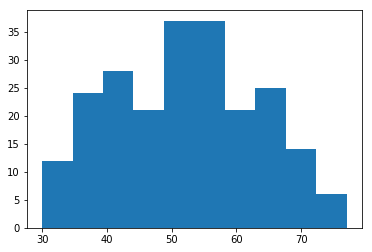

In [6]:
plt.hist(five_or_longer)
plt.show()

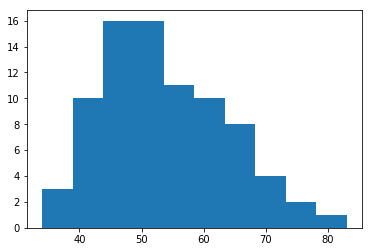

In [7]:
plt.hist(less_than_five)
plt.show()

<u>Equal variances test:

In [8]:
from scipy.stats import bartlett

bartlett(five_or_longer, less_than_five)

BartlettResult(statistic=0.7289916305727802, pvalue=0.3932102356442275)

Since p-value > 0.05, we can conclude that that the population variances are not significantly different at 5% LOS.

<u>Test for normality of populations:

In [9]:
from scipy.stats import shapiro

print(shapiro(five_or_longer))
print(shapiro(less_than_five))

(0.9842116236686707, 0.013179867528378963)
(0.9763393402099609, 0.13881994783878326)


According to the Normality test, "five or longer's" population is not normal at 5% LOS. But because the sample size for "five or longer" is 285, it is safe to assume normality.

Hence, we can assume that the populations that they come from must be approximately normal and almost have equal variances

<b>Hypothesis:

<u>Null hypothesis:</u> The true means are equal (Mu1 = Mu2)<br>
<u>Alternate hypothesis:</u> People who survive more than 5 years have average age less than those who don't (Mu1 < Mu2)

The level of significance = 5%

In [40]:
from scipy.stats import ttest_ind

t_stat,pvalue = ttest_ind(less_than_five, five_or_longer)

In [41]:
pvalue/2

0.11797892563414822

Since we performed a two-tailed test, we divided the pvalue for the same by 2 to get a one-sided t-test's pvalue.

<b>Since the p-value > 0.05, we can conclude that the mean age of the people who died within 5 years and those who lived 5 or more years is not significantly different at 5%.

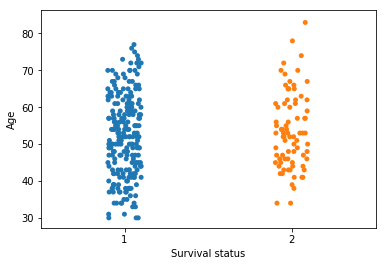

In [12]:
sns.stripplot(x='Survival status', y="Age", data=data)

<b>Further inspection on the sample:

For the people who died within 5 years:

In [20]:
print( data[data['Survival status'] == 2].Age.max() )
print( data[data['Survival status'] == 2].Age.median() )
print( data[data['Survival status'] == 2].Age.min() )

83
53.0
34


For the people who lived more than 5 years:

In [21]:
print( data[data['Survival status'] == 1].Age.max() )
print( data[data['Survival status'] == 1].Age.median() )
print( data[data['Survival status'] == 1].Age.min() )

77
52.0
30


As we can see that the sample medians along with the hypothesis conclusion state that there is not a signifcant difference between the Age for people who died within 5 years and those who lived more than 5 years. Where we can notice a difference is the maximum age for both kinds of people.

<b>========================================================================================================================================================

### Chi-squared test for testing if Having axillary nodes found dependent or independent of Survival status

<b>Hypothesis:

<u>Null hypothesis:</u> Having axillary nodes and Survival status are independent<br>
<u>Alternate hypothesis:</u> They are not independent

LOS = 5%

In [13]:
def binarize_Axillary_nodes(Survival):
    result = []
    for i in Survival:
        if i == 0:
            result.append('Absent')
        else:
            result.append('Present')
    return result

data['Binary Axillary nodes'] = binarize_Axillary_nodes(data['Axillary nodes'])

Contingency table of Axillary nodes (binary) and Survival status:

In [14]:
contingency_table = pd.crosstab(data['Binary Axillary nodes'], data['Survival status'], margins=False)

In [15]:
from scipy.stats import chi2_contingency

chi2, p, dof, ex = chi2_contingency(contingency_table)

In [16]:
p

1.6874936668661404e-05

The p-value < 0.05, which states that there is a significant relationship between having Axillary nodes and Survival status at 5% LOS

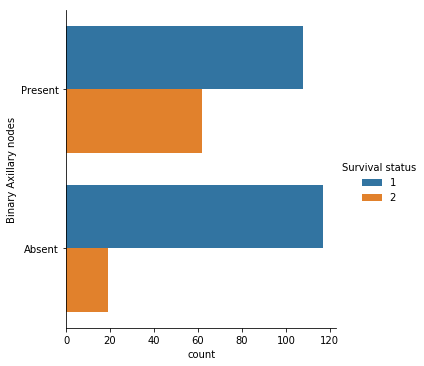

In [24]:
sns.catplot(y='Binary Axillary nodes',kind='count', hue="Survival status", data=data)

As we can see that of all the people who died within 5 years, only few of them had no axilary nodes whereas majority of those who did not have axillary nodes lived more than 5 years. Of those who had axillary nodes, they had an almost equal chance of dying or surviving within 5 years. But we still cannot make solid conclusions.

<b>========================================================================================================================================================

### t-test for finding if the average number of axillary nodes are more in people who died within 5 years of operation

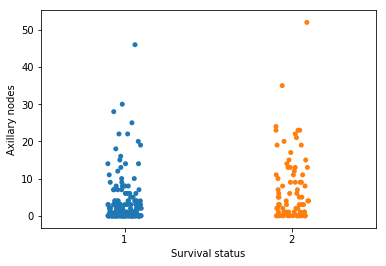

In [26]:
sns.stripplot(y='Axillary nodes', x="Survival status", data=data)

From the plot, they dont seem signifcantly different. Let us test the hypothesis:

In [29]:
five_or_longer_an = data[data['Survival status'] == 1]['Axillary nodes']
less_than_five_an = data[data['Survival status'] == 2]['Axillary nodes']

Descriptive statistics

In [32]:
print('Means:')
print(five_or_longer_an.mean())
print(less_than_five_an.mean())

Means:
2.7911111111111113
7.45679012345679


In [33]:
print('Standard deviations:')
print(five_or_longer_an.std())
print(less_than_five_an.std())

Standard deviations:
5.870318127719728
9.185653736555782


In [34]:
print('Sample sizes:')
print(len(five_or_longer_an))
print(len(less_than_five_an))

Sample sizes:
225
81


<u>Equal variances test:

In [36]:
bartlett(five_or_longer_an, less_than_five_an)

BartlettResult(statistic=26.415224723312946, pvalue=2.753614892152782e-07)

Since p-value < 0.05, we can conclude that that the population variances are significantly different at 5% LOS.

<u>Test for normality of populations:

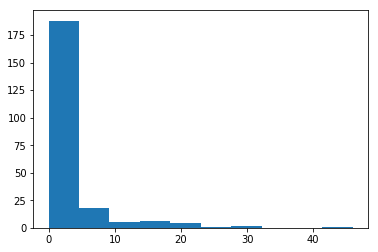

In [42]:
plt.hist(five_or_longer_an)
plt.show()

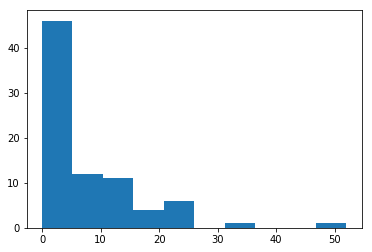

In [46]:
plt.hist(less_than_five_an)
plt.show()

In [38]:
from scipy.stats import shapiro

print(shapiro(five_or_longer_an))
print(shapiro(less_than_five_an))

(0.5308936834335327, 3.725325021855211e-24)
(0.7775712013244629, 9.935794409443588e-10)


According to the Normality test, both the populations are not normal at 5% LOS. But because the sample sizes are huge, it is safe to assume normality.

Hence, we can assume that the populations that they come from must be approximately normal and have unequal variances

<b>Hypothesis:

<u>Null hypothesis:</u> There are equal number of axillary nodes in both people who survived -5 years and 5+ years<br>
<u>Alternate hypothesis:</u> People who survived less than 5 years have more axillary nodes found

In [39]:
t_stat,p = ttest_ind(less_than_five_an, five_or_longer_an , equal_var=False)
p/2

2.1726354971431184e-05

Since pvalue < 0.05, we have enough evidence to reject the null hypothesis, thereby concluding that People who survived less than 5 years have more axillary nodes found than those who survived more than 5 years

<b>========================================================================================================================================================

### Correlation test between Age and Number of axillary nodes found

<b>Hypothesis:

<u>Null hypothesis:</u> Population correlation co-efficient = 0<br>
<u>Alternate hypothesis:</u> Population correlation co-efficient != 0

LOS = 5%

There seems to be no apparent relationship between Age and number of axillary nodes found from this scatterplot, Let us test our hypothesis

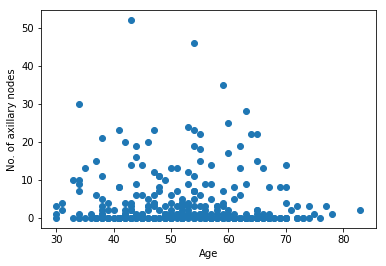

In [48]:
plt.scatter(x = data['Age'], y = data['Axillary nodes'])
plt.xlabel('Age')
plt.ylabel('No. of axillary nodes')
plt.show()

In [49]:
from scipy.stats import pearsonr

pearsonr(data['Age'], data['Axillary nodes'])

(-0.06317610238980065, 0.270588471285462)

The p-value for the correlation test > 0.05 which means we do not have enough evidence to reject null hypothesis. Which means our population correlation co-efficient is not significantly different from zero.

<b>========================================================================================================================================================

## Chi-squared test (independence of attributes) : Years vs Survival status 
#### (to see if time had a part (in terms of advancement in medicines) in better survival)

In [50]:
data.Year.unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

<b>Hypothesis:

<u>Null hypothesis:</u>Years and Survival status are independent of each other<br>
<u>Alternate hypothesis:</u>Years and Survival status are not independent of each other

LOS = 5%<BR>
<br>
Contingency table below:

In [52]:
contingency_table2 = pd.crosstab(data['Survival status'],data['Year'])
contingency_table2

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival status,,,,,,,,,,,,
1,24,18,24,23,16,22,23,15,22,21,10,7
2,12,9,4,3,7,8,8,13,6,4,3,4


In [54]:
chi22, p2, dof2, ex2 = chi2_contingency(contingency_table2)

In [55]:
p2

0.18404943752396902

Since the p-value > 0.05, we do not have enough evidence to reject the null hypothesis. Hence, there is no signficant relationship between Year of operation and Survival status at 5% LOS.

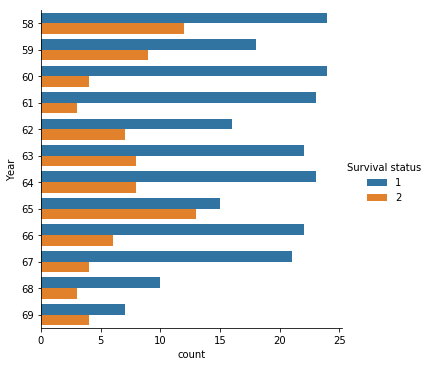

In [57]:
sns.catplot(y='Year',kind='count', hue="Survival status", data=data)

As we can see, even the distribution in the bargraph seems to be randomly distributed.

<b>========================================================================================================================================================